In [1]:
import numpy as np
import torch

data1  = np.load('/nfs-04/yuyue/visualtts_datasets/chem/chem_for_espnet/preprocessed_data/lip_feature/chem_00_ZwsWjelzqDA-062.npy')
data1 = torch.from_numpy(data1).float()

length = 250
data1 = torch.nn.functional.pad(data1, (0, 0, 0, length - data1.shape[0]), mode='constant', value=0)
data1.shape # [avhubert_len, 1024 (avhubert_dim)]

torch.Size([250, 1024])

In [2]:
data2 = np.load('/home/chengxin/chengxin/Dataset_Sound/Chem/preprocessed_data/duration_matrix_25/chem_00_ZwsWjelzqDA-062.npy')
data2 = torch.from_numpy(data2).float()

pad_seq_length = 120
data2 = torch.nn.functional.pad(data2, (0, pad_seq_length - data2.shape[-1]), mode='constant', value=0)
data2.shape   # [250 (avhubert_len pad to latent_len), phone_seq_len]

torch.Size([250, 120])

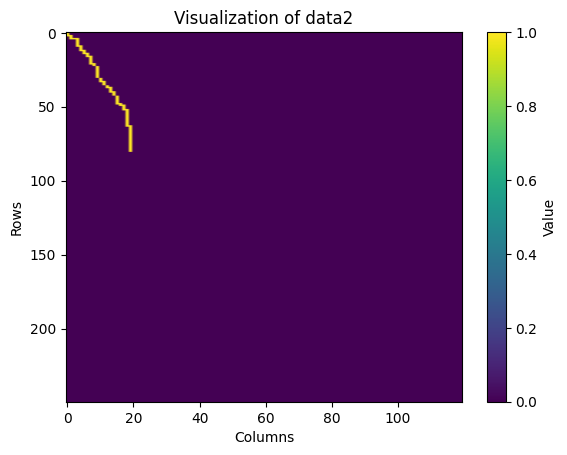

In [3]:
import matplotlib.pyplot as plt

plt.imshow(data2, aspect='auto', cmap='viridis')
plt.colorbar(label='Value')
plt.title('Visualization of data2')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt


name = 'chem_00_0G0wCm28Jzc-003'
path = '/home/chengxin/chengxin/vasflow/log/2025_07_04-12_31_34-dp_Lattn/val/video/epoch_0319_global_step_3.97e+04'


data0  = np.load(f'{path}/{name}_attn.npy')
data0 = torch.from_numpy(data0).float()


data1  = np.load(f'{path}/{name}.npy')
data1 = torch.from_numpy(data1).float()


data2  = np.load(f'/home/chengxin/chengxin/Dataset_Sound/Chem/preprocessed_data/duration_matrix_25/{name}.npy')
data2 = torch.from_numpy(data2).float()

# length = 250
# data1 = torch.nn.functional.pad(data1, (0, 0, 0, length - data1.shape[0]), mode='constant', value=0)
data0.shape, data1.shape, data2.shape, data0.sum(), data1.sum(), data2.sum(), (data1 - data2).sum()

(torch.Size([250, 23]),
 torch.Size([250, 23]),
 torch.Size([250, 23]),
 tensor(57.),
 tensor(75.),
 tensor(72.),
 tensor(3.))

In [10]:
def maxPathSumWithPath(matrix):
    m, n = len(matrix), len(matrix[0])
    dp = [[float('-inf')] * n for _ in range(m)]
    prev = [[None] * n for _ in range(m)]  # 记录前驱方向
    
    # 初始化起点
    dp[0][0] = matrix[0][0]
    for j in range(1, n):
        dp[0][j] = dp[0][j-1] + matrix[0][j]
        prev[0][j] = 'left'
    for i in range(1, m):
        dp[i][0] = dp[i-1][0] + matrix[i][0]
        prev[i][0] = 'up'
    
    # 填充 dp 数组并记录前驱
    for i in range(1, m):
        for j in range(1, n):
            max_val = float('-inf')
            direction = None
            
            # 检查上方
            if i > 0 and dp[i-1][j] > max_val:
                max_val = dp[i-1][j]
                direction = 'up'
            # 检查左方
            if j > 0 and dp[i][j-1] > max_val:
                max_val = dp[i][j-1]
                direction = 'left'
            # 检查左上方
            if i > 0 and j > 0 and dp[i-1][j-1] > max_val:
                max_val = dp[i-1][j-1]
                direction = 'diag'
            
            dp[i][j] = max_val + matrix[i][j]
            prev[i][j] = direction
    
    # 回溯路径
    path = []
    i, j = m-1, n-1
    while i >= 0 and j >= 0:
        path.append((i, j))
        if prev[i][j] == 'up':
            i -= 1
        elif prev[i][j] == 'left':
            j -= 1
        elif prev[i][j] == 'diag':
            i -= 1
            j -= 1
        else:
            break  # 到达起点 (0,0)
    
    path.reverse()  # 反转得到从 (0,0) 到 (m-1,n-1) 的路径
    return dp[m-1][n-1], path


def findFirstZero(tensor):
    zero_mask = (tensor == 0)  # 找到所有 0 的位置
    indices = torch.nonzero(zero_mask, as_tuple=False)  # 获取 0 的坐标
    return indices[0].item() if indices.numel() > 0 else -1


import copy
data000 = copy.deepcopy(data0)
data000[data000 < 0.1] = 0


max_sum, path = maxPathSumWithPath(data000-1)
print(f"最大路径和: {max_sum}")
print(f"路径: {path}")
data000 = torch.zeros_like(data0)
for p in path:
    data000[p[0], p[1]] = 1
data000[findFirstZero(data2.sum(-1)):] = 0   # hubert_length之后全都设置为0

最大路径和: -199.71597290039062
路径: [(0, 0), (1, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 3), (7, 4), (8, 4), (9, 5), (10, 5), (11, 6), (12, 6), (13, 7), (14, 8), (15, 8), (16, 9), (17, 10), (18, 10), (19, 11), (20, 12), (21, 13), (22, 14), (23, 15), (24, 15), (25, 16), (26, 16), (27, 16), (28, 16), (29, 17), (30, 17), (31, 18), (32, 18), (33, 18), (34, 18), (35, 18), (36, 19), (37, 19), (38, 19), (39, 19), (40, 19), (41, 19), (42, 20), (43, 20), (44, 21), (45, 21), (46, 21), (47, 21), (48, 22), (49, 22), (50, 22), (51, 22), (52, 22), (53, 22), (54, 22), (55, 22), (56, 22), (57, 22), (58, 22), (59, 22), (60, 22), (61, 22), (62, 22), (63, 22), (64, 22), (65, 22), (66, 22), (67, 22), (68, 22), (69, 22), (70, 22), (71, 22), (72, 22), (73, 22), (74, 22), (75, 22), (76, 22), (77, 22), (78, 22), (79, 22), (80, 22), (81, 22), (82, 22), (83, 22), (84, 22), (85, 22), (86, 22), (87, 22), (88, 22), (89, 22), (90, 22), (91, 22), (92, 22), (93, 22), (94, 22), (95, 22), (96, 22), (97, 22), (98, 22), (99, 

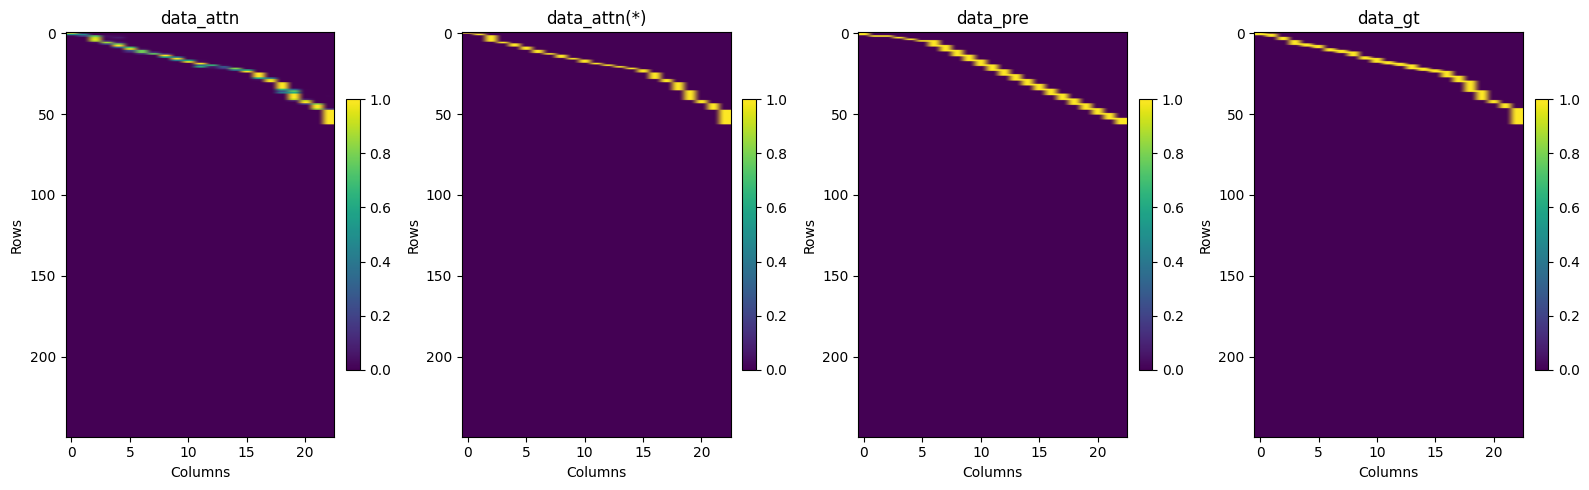

tensor(31.) tensor(117.)


In [13]:
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

axs[0].imshow(data0, aspect='auto', cmap='viridis')
axs[0].set_title('data_attn')
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Rows')
plt.colorbar(axs[0].images[0], ax=axs[0], fraction=0.046, pad=0.04)

axs[1].imshow(data000, aspect='auto', cmap='viridis')
axs[1].set_title('data_attn(*)')
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('Rows')
plt.colorbar(axs[1].images[0], ax=axs[1], fraction=0.046, pad=0.04)

axs[2].imshow(data1, aspect='auto', cmap='viridis')
axs[2].set_title('data_pre')
axs[2].set_xlabel('Columns')
axs[2].set_ylabel('Rows')
plt.colorbar(axs[2].images[0], ax=axs[2], fraction=0.046, pad=0.04)

axs[3].imshow(data2, aspect='auto', cmap='viridis')
axs[3].set_title('data_gt')
axs[3].set_xlabel('Columns')
axs[3].set_ylabel('Rows')
plt.colorbar(axs[3].images[0], ax=axs[3], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print((data000-data2).abs().sum(), (data1-data2).abs().sum())